Loading the data

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/datasets/

/content/gdrive/My Drive/datasets


In [ ]:
import numpy as np
import pandas as pd
#import statistics
df2 = pd.read_csv('SVP_data.csv')

In [ ]:
df2

,Temperature( C),Liquid Phase Mass Density,Sat Vap Pressure
0,-162.0,424.596182,100.038004
1,-161.8,424.299933,101.692902
2,-161.6,424.003380,103.368892
3,-161.4,423.706521,105.066151
4,-161.2,423.409355,106.784860
...,...,...,...
298,-150.8,425.636913,225.865259
299,-150.6,425.330609,228.877954
300,-150.4,425.023957,231.920857
301,-150.2,424.716954,234.994154


In [ ]:
import io
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values
m = X.shape[0]
X = (X - X.mean(axis=0))/(X.std(axis=0))
ones = np.ones((m,1))
X =np.concatenate((ones,X),axis=1)
#print(X)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state =26)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.33, random_state =25)

In [ ]:
def column(matrix, i):
    return [row[i] for row in matrix]

#**Implementation of Methods in the Reference Paper**

#Multi Layer Perceptron Regression

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df2 = pd.read_csv('SVP_data.csv')
#np.random.shuffle(dataset)


In [ ]:
X = df2.iloc[:, :-1].values
Y = df2.iloc[:, -1].values
X = (X - X.mean(axis=0))/(X.std(axis=0))
input_shape = (2,)
print(f'Feature shape: {input_shape}')

Feature shape: (2,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8)

In [ ]:
model = Sequential()
model.add(Dense(5, input_shape=input_shape, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(x_train, y_train, epochs=500, batch_size=1, verbose=1, validation_split=0.125)

Epoch 1/500
211/211 [==============================] - 1s 2ms/step - loss: 162.8285 - mean_squared_error: 28252.4180 - val_loss: 162.8481 - val_mean_squared_error: 28101.9414
Epoch 2/500
211/211 [==============================] - 0s 2ms/step - loss: 161.8970 - mean_squared_error: 27950.6855 - val_loss: 161.8902 - val_mean_squared_error: 27790.5195
Epoch 3/500
211/211 [==============================] - 0s 2ms/step - loss: 160.9121 - mean_squared_error: 27630.2363 - val_loss: 160.8791 - val_mean_squared_error: 27463.8008
Epoch 4/500
211/211 [==============================] - 0s 2ms/step - loss: 159.8781 - mean_squared_error: 27297.7891 - val_loss: 159.8221 - val_mean_squared_error: 27124.8633
Epoch 5/500
211/211 [==============================] - 0s 2ms/step - loss: 158.8044 - mean_squared_error: 26958.1992 - val_loss: 158.7298 - val_mean_squared_error: 26776.5020
Epoch 6/500
211/211 [==============================] - 0s 2ms/step - loss: 157.6974 - mean_squared_error: 26606.9004 - val_lo

In [ ]:
mae,ms_e = model.evaluate(x_test, y_test,batch_size=1, verbose=1)

61/61 [==============================] - 0s 3ms/step - loss: 2.2635 - mean_squared_error: 19.4131


In [ ]:
y_pred = model.predict(x_test).T[0]

In [ ]:
rmse = math.sqrt(ms_e)
rmse

4.406027497429569

In [ ]:
mae

2.263472557067871

0.9976932533660026

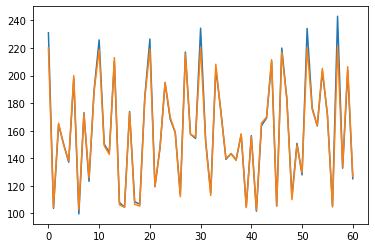

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)
cc = np.corrcoef(y_pred,y_test).mean()
cc

In [ ]:
model.layers[0].weights

[<tf.Variable 'dense_16/kernel:0' shape=(2, 5) dtype=float32, numpy=
 array([[ 3.089087  ,  3.0252206 ,  4.5517807 ,  4.9343553 ,  4.8026576 ],
        [ 2.278378  ,  2.223665  , -0.1388823 , -0.11427688, -0.2380489 ]],
       dtype=float32)>,
 <tf.Variable 'dense_16/bias:0' shape=(5,) dtype=float32, numpy=
 array([ 9.035034 ,  9.555961 ,  0.3672678,  5.3573947, -4.2542663],
       dtype=float32)>]

In [ ]:
model.layers[1].weights

[<tf.Variable 'dense_17/kernel:0' shape=(5, 1) dtype=float32, numpy=
 array([[34.42554],
        [33.82785],
        [38.02597],
        [34.35124],
        [47.73848]], dtype=float32)>,
 <tf.Variable 'dense_17/bias:0' shape=(1,) dtype=float32, numpy=array([33.401997], dtype=float32)>]

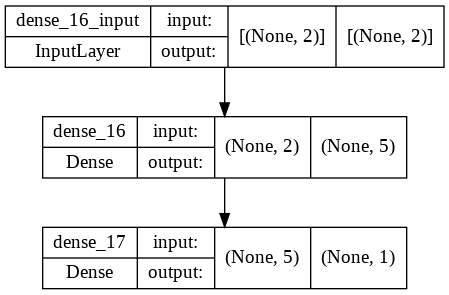

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes= True, show_layer_names=True)

#Transparent Open Box (TOB) Learning Network

In [ ]:
#Step 1: Set up a 2-D array of N input variables and one dependent variable to be predicted for each of M data records.
data = df2.values

In [ ]:
data

array([[-162.        ,  424.5961819 ,  100.038004  ],
       [-161.8       ,  424.299933  ,  101.6929019 ],
       [-161.6       ,  424.0033799 ,  103.3688915 ],
       [-161.4       ,  423.706521  ,  105.0661511 ],
       [-161.2       ,  423.4093549 ,  106.7848596 ],
       [-161.        ,  423.11188   ,  108.5251962 ],
       [-160.8       ,  422.814095  ,  110.287341  ],
       [-160.6       ,  422.5159983 ,  112.0714744 ],
       [-160.4       ,  422.2175883 ,  113.8777774 ],
       [-160.2       ,  421.9188635 ,  115.7064315 ],
       [-160.        ,  421.6198224 ,  117.5576189 ],
       [-159.8       ,  421.3204635 ,  119.4315221 ],
       [-159.6       ,  421.0207851 ,  121.3283242 ],
       [-159.4       ,  420.7207857 ,  123.2482088 ],
       [-159.2       ,  420.4204637 ,  125.1913601 ],
       [-159.        ,  420.1198175 ,  127.1579625 ],
       [-158.8       ,  419.8188457 ,  129.1484348 ],
       [-158.6       ,  419.5175463 ,  131.1625269 ],
       [-158.4       ,  419.

In [ ]:
#Step 2: Arrange the data records in a systematic order defined by the prediction variable's values (e.g. ascending or descending value order).
data_sort = data[data[:,2].argsort()]

In [ ]:
data_sort

array([[-162.        ,  438.0085904 ,   98.83663099],
       [-162.        ,  442.282634  ,   99.68085616],
       [-162.        ,  424.5961819 ,  100.038004  ],
       [-162.        ,  434.8641751 ,  100.2231783 ],
       [-162.        ,  428.5663823 ,  100.2650001 ],
       [-161.8       ,  437.7180646 ,  100.4483903 ],
       [-161.8       ,  441.9933868 ,  101.2929644 ],
       [-161.8       ,  424.299933  ,  101.6929019 ],
       [-161.8       ,  434.5721698 ,  101.8529242 ],
       [-161.8       ,  428.2718019 ,  101.9105296 ],
       [-161.6       ,  437.4272642 ,  102.0804504 ],
       [-161.6       ,  441.7038725 ,  102.925247  ],
       [-161.6       ,  424.0033799 ,  103.3688915 ],
       [-161.6       ,  434.2798828 ,  103.5031564 ],
       [-161.6       ,  427.9769263 ,  103.576901  ],
       [-161.4       ,  437.1361879 ,  103.7329808 ],
       [-161.4       ,  441.41409   ,  104.5778714 ],
       [-161.4       ,  423.706521  ,  105.0661511 ],
       [-161.4       ,  433.

In [ ]:
#Step 3: Derive maximum and minimum values (and other standard statistics, such as mean and standard deviation) for all records in the dataset
#Step 4: Normalize the data in the array so each variable spans a range from minus 1 to plus 1 (−1,+1). This is achieved by using Eq. (A1)
#Xi* = 2*[(Xi- Xmin)/(Xmax-Xmin)]-1 (A1)
#Where:
#Xi = variable X value for the ith data record
#Xmin = minimum value of variable X
#Xmax = maximum value of variable X
#Xi* is the normalized value of variable X for the ith data record.

data_norm = (2*((data_sort-data.min(axis = 0))/((data.max(axis=0))-(data.min(axis=0)))))-1

In [ ]:
data_norm

array([[-1.00000000e+00,  7.62919589e-01, -1.00000000e+00],
       [-1.00000000e+00,  1.00000000e+00, -9.88290135e-01],
       [-1.00000000e+00,  1.89357588e-02, -9.83336299e-01],
       [-1.00000000e+00,  5.88499451e-01, -9.80767830e-01],
       [-1.00000000e+00,  2.39162044e-01, -9.80187738e-01],
       [-9.66666667e-01,  7.46804176e-01, -9.77644016e-01],
       [-9.66666667e-01,  9.83955511e-01, -9.65929311e-01],
       [-9.66666667e-01,  2.50288684e-03, -9.60381959e-01],
       [-9.66666667e-01,  5.72301971e-01, -9.58162362e-01],
       [-9.66666667e-01,  2.22821723e-01, -9.57363343e-01],
       [-9.33333333e-01,  7.30673531e-01, -9.55006449e-01],
       [-9.33333333e-01,  9.67896206e-01, -9.43288658e-01],
       [-9.33333333e-01, -1.39468590e-02, -9.37135066e-01],
       [-9.33333333e-01,  5.56088865e-01, -9.35272738e-01],
       [-9.33333333e-01,  2.06465028e-01, -9.34249860e-01],
       [-9.00000000e-01,  7.14527582e-01, -9.32084948e-01],
       [-9.00000000e-01,  9.51822024e-01

In [ ]:
#Step 5. Generate statistical analysis of the normalized values to check that the variables are all correctly normalized.
df_norm = pd.DataFrame(data_norm)
df_norm.describe()

,0,1,2
count,303.000000,303.000000,303.000000
mean,0.000990,0.022793,-0.117072
std,0.589111,0.465077,0.573589
min,-1.000000,-1.000000,-1.000000
25%,-0.500000,-0.302710,-0.627924
50%,0.000000,0.025438,-0.168889
75%,0.500000,0.374246,0.361560
max,1.000000,1.000000,1.000000


In [ ]:
#Step 6. Distribute the data records between training, tuning and testing subsets. Sensitivity analysis is conducted to establish the optimum
#percentage of data records to allocate to each data subset. Firstly, the data records to be used for testing are extracted from the complete data set
#and placed to one side. Sensitivity analysis then helps to divide the remaining data records between the training and tuning subsets in proportions
#that achieve an acceptable prediction accuracy. For most data sets the training subset is likely to hold more than seventy-five percent of the data
#records. For large datasets of several thousand data records the sensitivity analysis often reveals that the training subset can be a much larger
#percentage without compromising prediction accuracy.
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data_norm, train_size=0.7, random_state = 126)
data_tune, data_test = train_test_split(data_test, test_size=(1/3), random_state = 26)

In [ ]:
def var_sqr_err(var):
  VSE = np.zeros((data_tune.shape[0],data_train.shape[0]))
  for j in range(data_tune.shape[0]):
    for k in range(data_train.shape[0]):
      VSE[j][k] = (data_tune[j][var]-data_train[k][var])**2
  return VSE

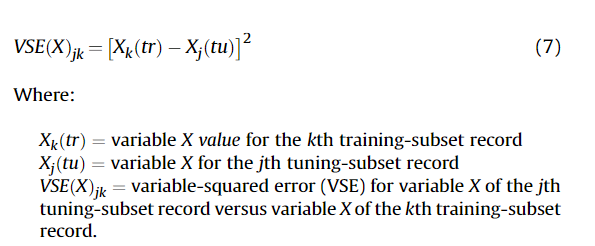

In [ ]:
#Step 7. The variable squared error (VSE) between each variable in the J data records of the tuning-data subset and the K data records in the
#training-data subset are calculated 
vse = {}
for i in range(data.shape[1]):
  vse[i] = var_sqr_err(i)

In [ ]:
vse

{0: array([[7.11111111e-02, 1.28444444e+00, 1.52111111e+00, ...,
         0.00000000e+00, 1.60000000e-01, 1.00000000e+00],
        [2.15111111e+00, 4.44444444e-03, 1.11111111e-03, ...,
         1.44000000e+00, 6.40000000e-01, 4.00000000e-02],
        [1.77777778e+00, 4.44444444e-03, 2.77777778e-02, ...,
         1.13777778e+00, 4.44444444e-01, 4.44444444e-03],
        ...,
        [3.00444444e+00, 1.11111111e-01, 5.44444444e-02, ...,
         2.15111111e+00, 1.13777778e+00, 2.17777778e-01],
        [3.61000000e+00, 2.50000000e-01, 1.60000000e-01, ...,
         2.66777778e+00, 1.52111111e+00, 4.01111111e-01],
        [4.90000000e-01, 4.90000000e-01, 6.40000000e-01, ...,
         1.87777778e-01, 1.11111111e-03, 3.21111111e-01]]),
 1: array([[1.89096563e-02, 9.70432868e-01, 2.19600793e-03, ...,
         1.76958916e-01, 2.30483822e-02, 2.54682093e-01],
        [1.33451816e+00, 1.06247135e-03, 9.42529337e-01, ...,
         3.56452264e-01, 1.36777240e+00, 2.63210770e-01],
        [1.04260512

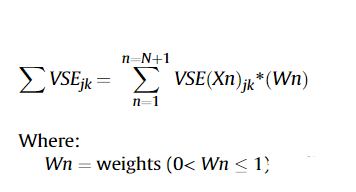

In [ ]:
vse_sum = np.zeros((data_tune.shape[0],data_train.shape[0]))
w =0.5
for j in range(data_tune.shape[0]):
  for k in range(data_train.shape[0]):
    for i in range(data.shape[1]):
      vse_sum[j][k] += vse[i][j][k]*w 

In [ ]:
vse_sum

array([[1.01878271e-01, 1.80871708e+00, 1.52230696e+00, ...,
        8.88521512e-02, 1.89770676e-01, 1.16826729e+00],
       [2.95820225e+00, 4.24190409e-03, 4.71887106e-01, ...,
        1.61169532e+00, 1.30697317e+00, 1.68117488e-01],
       [1.96268040e+00, 3.24820295e-01, 3.34531545e-02, ...,
        1.16357317e+00, 4.89625924e-01, 5.45478393e-02],
       ...,
       [3.42313209e+00, 1.18345360e-01, 2.80832602e-01, ...,
        2.09195086e+00, 1.43693981e+00, 2.06762950e-01],
       [4.51184256e+00, 2.26454892e-01, 8.26650733e-01, ...,
        2.81397518e+00, 2.32124800e+00, 5.90468338e-01],
       [7.59344796e-01, 6.24064646e-01, 6.33753638e-01, ...,
        2.17323023e-01, 1.55312169e-01, 2.99530380e-01]])

In [ ]:
#Step 8. Select and rank (lowest in ∑VSE is ranked number 1) the top-Q-matching data records in the training subset for each tuning subset data
#record. Q = 10 is typically sufficient for TOB stage 1. However, Q could be adjusted to higher or lower values, if necessary, to improve prediction
#accuracy.

lowest_vse_sum = pd.DataFrame(vse_sum.T)
cols = []
for i in range(lowest_vse_sum.shape[1]):
  cols.append(i)
top_ten_sum = []
for i in range(lowest_vse_sum.shape[1]):
  lowest_ten_sum = lowest_vse_sum.sort_values(ascending = True, by = cols[i])
  df_ten_sum = pd.DataFrame(lowest_ten_sum)
  top_ten_sum.append(lowest_ten_sum[i].tolist()[:10])
top_ten_sum

[[0.0015125016854570141,
  0.001529568066193377,
  0.006152883336775308,
  0.01374782812286102,
  0.013922586029880151,
  0.016740830832660307,
  0.022741088244831374,
  0.023106254882450154,
  0.024892292149850167,
  0.0316774450892625],
 [0.0010560237652113814,
  0.004171800323274837,
  0.004241904089479132,
  0.009348166655927777,
  0.01655145726513834,
  0.025757308605083636,
  0.027062211942513542,
  0.02845265550098897,
  0.030693164579720187,
  0.033096091758545956],
 [0.0011074286967389393,
  0.0011174566072300613,
  0.004409978261348955,
  0.00987851767079377,
  0.010149307215052777,
  0.018126482258891057,
  0.021665541662391815,
  0.023448944070724412,
  0.024681279807766982,
  0.02720014894139878],
 [0.0014451948236421813,
  0.0014611023109943374,
  0.005876674797745226,
  0.01329579861958464,
  0.013614732520150791,
  0.016427639022770543,
  0.022054731468434632,
  0.022750222682296695,
  0.026880411500105075,
  0.02758996399720966],
 [0.0010691662491566737,
  0.0010784598

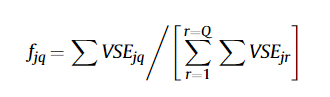

In [ ]:
#Step 9. The Q-selected training-subset data records (i.e. best matches) for the jth tuning-subset data record each contribute a fraction to the
#prediction of the dependent variable. That fraction is proportional to the relative ∑VSE scores of those Q records for the jth data record That
#fraction is calculated with Eq. (A4) to Eq. (A6) and
f = []
tot = sum(map(sum, top_ten_sum))
for j in range(len(top_ten_sum)):
  fq = []
  for q in range(10):
    val = top_ten_sum[j][q]/sum(top_ten_sum[j])
    fq.append(val)
  f.append(fq)

In [ ]:
f

[[0.00969407706707376,
  0.00980346062129065,
  0.03943567522927495,
  0.08811395491941511,
  0.0892340307745452,
  0.10729700721597368,
  0.14575445710522208,
  0.14809491963920665,
  0.15954216831424534,
  0.20303024911375236],
 [0.0058527915190326124,
  0.02312133339752355,
  0.02350986890383444,
  0.05181026443222689,
  0.09173300062015342,
  0.1427545120888104,
  0.1499866667410671,
  0.15769291023181803,
  0.1701104646148757,
  0.183428187450658],
 [0.007810614884045559,
  0.007881341014918343,
  0.031103259241736396,
  0.06967247406448385,
  0.0715823332283844,
  0.12784477460588825,
  0.15280550583301183,
  0.16538371464752386,
  0.1740752898958714,
  0.19184069258413614],
 [0.009545762903220588,
  0.009650834621002536,
  0.03881645807257402,
  0.08782105993962969,
  0.08992767376552975,
  0.10850740993927609,
  0.14567533321306747,
  0.15026917351763536,
  0.1775497882523123,
  0.18223650577575223],
 [0.0075419551686083525,
  0.007607513023667924,
  0.03003882853878791,
  0.03

In [ ]:
for i in range(len(top_ten_sum)):
  print(sum(f[i]))

0.9999999999999998
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999999999999998
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999999
1.0
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0
0.9999999999999998
1.0
1.0000000000000002
1.0
1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0


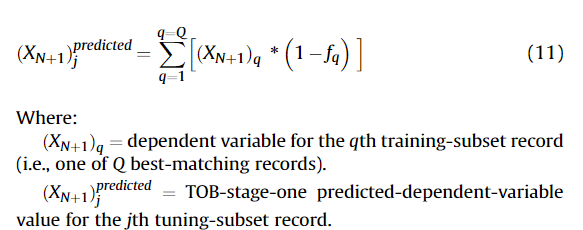

In [ ]:
#The matching training-subset data record with the lowest−γUjk value should contribute most to the dependent-variable prediction for the jth
#tuning-subset data record. To achieve this (1 - f) is the multiplier applied in Eq. (A6) to each of the Q top-matching records
y_pred = []
for j in range(data_tune.shape[0]):
  pred = 0
  for q in range(10):
    pred += data_train[q][2]*(1-f[j][q])
  y_pred.append(pred)

In [ ]:
y_pred

[-0.24126513331766322,
 -0.30440038331520086,
 -0.3021340513981783,
 -0.24874366929660985,
 -0.36290982213644385,
 -0.2930047302038447,
 -0.18558947493966885,
 -0.26154557069312345,
 -0.23950300661462662,
 -0.19057936343877285,
 -0.20341630536977157,
 -0.24983199817464188,
 -0.18112474959507643,
 -0.3295512822181388,
 -0.1569401853165932,
 -0.20833779285696677,
 -0.3415621103302428,
 -0.3322228232617601,
 -0.2945934097202877,
 -0.2192814886778533,
 -0.2317979459591721,
 -0.2911419874042327,
 -0.2468552052892294,
 -0.33374024047865986,
 -0.2949257359560986,
 -0.2861762877576899,
 -0.25076884315855114,
 -0.2546824583558829,
 -0.2761014095383715,
 -0.22696510401460945,
 -0.2093117986658072,
 -0.3024565410486109,
 -0.23390743879765122,
 -0.24280220994705679,
 -0.18757408019865413,
 -0.18989931266324883,
 -0.2016532307058613,
 -0.23575933933774101,
 -0.192749951272105,
 -0.2553945330506787,
 -0.3066966835554619,
 -0.15248525621834613,
 -0.18081766553150003,
 -0.276215720810109,
 -0.22329272

In [ ]:
df_tune = pd.DataFrame(data_tune)
y_act = df_tune[2].tolist()
y_act

[0.6262450398704729,
 -0.595601971089708,
 -0.465955935090155,
 0.471275691034313,
 -0.5789240664488602,
 -0.6613980516852456,
 0.9316319273709539,
 -0.2863562307103307,
 0.5644540424003108,
 0.356569679948209,
 -0.15961733107290932,
 -0.686676683327355,
 0.46761421188444996,
 -0.9135931457307166,
 0.39440810894990386,
 -0.6638841281608011,
 -0.027079145837742624,
 0.18359785022024577,
 -0.8631505252952719,
 -0.1652439020008759,
 0.686887345179549,
 -0.18964860870453282,
 0.14700489235035152,
 -0.8411723834833411,
 -0.4074629043975908,
 -0.25349945459769485,
 -0.4966666517791769,
 0.8037443466688847,
 -0.9320849476342562,
 -0.660221174571744,
 0.4532440015436916,
 -0.6224081258977712,
 -0.8164463669350862,
 -0.4567918460948752,
 0.06780785723806959,
 -0.9581623619110687,
 0.2193235743037769,
 -0.2633591487734248,
 0.3754749919993483,
 -0.9120965857878331,
 -0.30975935489208983,
 -0.32459007018225927,
 -0.19183918703723846,
 0.4849162967087144,
 0.3372129537044566,
 -0.5132814717831726,

In [ ]:
n2 = 0
import statistics
for j in range(len(y_pred)):
  n2 += (y_pred[j]-y_act[j])**2
n1 = 0
av = statistics.mean(y_act)
for j in range(len(y_pred)):
  n1 += (av - y_pred[j])**2
r2 = 1-(n1/n2)
rmse = math.sqrt(n2/(len(y_pred)))

In [ ]:
r2

0.9532656974700052

In [ ]:
rmse

0.5531315857304091

In [ ]:
def opt_wt(vse,w):
  VSE_sum = np.zeros((data_tune.shape[0],data_train.shape[0]))
  #w =np.linspace(0,1,num=100)
  for j in range(data_tune.shape[0]):
    for k in range(data_train.shape[0]):
      for i in range(data.shape[1]):
        VSE_sum[j][k] += vse[i][j][k]*w 
  return VSE_sum

In [ ]:
def optimized_Q(Q,vse_sum):
  lowest_vse_sum = pd.DataFrame(vse_sum.T)
  cols = []
  for i in range(lowest_vse_sum.shape[1]):
    cols.append(i)
  top_q_sum = []
  for i in range(lowest_vse_sum.shape[1]):
    lowest_q_sum = lowest_vse_sum.sort_values(ascending = True, by = cols[i])
    df_q_sum = pd.DataFrame(lowest_ten_sum)
    top_q_sum.append(lowest_q_sum[i].tolist()[:Q])
  return top_q_sum

In [ ]:
def fraction_Q(Q, top_q_sum):
  f = []
  tot = sum(map(sum, top_q_sum))
  for j in range(len(top_q_sum)):
    fq = []
    for q in range(Q):
      val = top_q_sum[j][q]/sum(top_q_sum[j])
      fq.append(val)
    f.append(fq)
  return f

In [ ]:
def predicted_values(Q, f):
  y_pred = []
  for j in range(data_tune.shape[0]):
    pred = 0
    for q in range(Q):
      pred += data_train[q][2]*(f[j][q])
    y_pred.append(pred)
  return y_pred

In [ ]:
df_tune = pd.DataFrame(data_tune)
y_act = df_tune[2].tolist()
y_act

[0.6262450398704729,
 -0.595601971089708,
 -0.465955935090155,
 0.471275691034313,
 -0.5789240664488602,
 -0.6613980516852456,
 0.9316319273709539,
 -0.2863562307103307,
 0.5644540424003108,
 0.356569679948209,
 -0.15961733107290932,
 -0.686676683327355,
 0.46761421188444996,
 -0.9135931457307166,
 0.39440810894990386,
 -0.6638841281608011,
 -0.027079145837742624,
 0.18359785022024577,
 -0.8631505252952719,
 -0.1652439020008759,
 0.686887345179549,
 -0.18964860870453282,
 0.14700489235035152,
 -0.8411723834833411,
 -0.4074629043975908,
 -0.25349945459769485,
 -0.4966666517791769,
 0.8037443466688847,
 -0.9320849476342562,
 -0.660221174571744,
 0.4532440015436916,
 -0.6224081258977712,
 -0.8164463669350862,
 -0.4567918460948752,
 0.06780785723806959,
 -0.9581623619110687,
 0.2193235743037769,
 -0.2633591487734248,
 0.3754749919993483,
 -0.9120965857878331,
 -0.30975935489208983,
 -0.32459007018225927,
 -0.19183918703723846,
 0.4849162967087144,
 0.3372129537044566,
 -0.5132814717831726,

In [ ]:
def errors(y_pred):
  n2 = 0
  import statistics
  for j in range(len(y_pred)):
    n2 += pow((y_pred[j]-y_act[j]),2)
  n1 = 0
  av = statistics.mean(y_act)
  for j in range(len(y_pred)):
    n1 += pow((y_pred[j] - av),2)
  #r2 = r2_score(y_act, y_pred)
  r2 = 1-(n1/n2)
  rmse = math.sqrt(n2/(len(y_pred)))
  return r2, rmse

In [ ]:
def predicted_values(Q, f, ds):
  y_pred = []
  for j in range(ds.shape[0]):
    pred = 0
    for q in range(Q):
      pred += data_train[q][2]*(1-f[j][q])
    y_pred.append(pred)
  return y_pred

In [ ]:
RMSE = []
R_2 = []
avals = [] 
w =np.linspace(0,1,num=20)
for wt in w:
  if wt !=0:
    for i in range(2,20):
      R2,root_mse= errors(predicted_values(i, fraction_Q(i, optimized_Q(i,opt_wt(vse,wt))),data_tune))
      RMSE.append(root_mse)
      R_2.append(R2)
      avals.append([i,wt])
rmse_opt = min(RMSE)
r2_opt = max(R_2)
#alloptind = [i for i, j in enumerate(RMSE) if j == rmse_opt]
alloptind = [i for i, j in enumerate(R_2) if j == r2_opt]
opt_ind = min(alloptind)
a_opt = avals[opt_ind]
print(RMSE)
print(R_2)
print("Minimum rmse: ", rmse_opt)
print("Maximum r2: ", r2_opt)
print("Optimal value of Q and weight: ",a_opt)
#plt.plot(avals[0],RMSE)
#plt.show(avals[1],RMSE)
#plt.show()

[0.7786641917091759, 0.6417790298484325, 0.6262879775116005, 1.1354397850747606, 0.9360097670365439, 0.7524316919703261, 0.598971037407458, 0.5432286706668948, 0.5531315857304091, 1.0157745628508286, 1.5646035071039195, 1.6684105296550023, 1.9537429293891377, 1.7180801404077124, 1.928340709172647, 1.798956119897734, 1.449340569045245, 0.8388913155980224, 0.7786641917091759, 0.6417790298484325, 0.6262879775116005, 1.1354397850747606, 0.9360097670365439, 0.7524316919703261, 0.598971037407458, 0.5432286706668948, 0.5531315857304091, 1.0157745628508286, 1.5646035071039195, 1.6684105296550023, 1.9537429293891377, 1.7180801404077124, 1.928340709172647, 1.798956119897734, 1.449340569045245, 0.8388913155980224, 0.7786641917091759, 0.6417790298484325, 0.6262879775116004, 1.1354397850747604, 0.9360097670365438, 0.7524316919703261, 0.598971037407458, 0.5432286706668948, 0.5531315857304091, 1.0157745628508286, 1.5646035071039195, 1.6684105296550023, 1.9537429293891377, 1.7180801404077124, 1.928340

In [ ]:
errors(predicted_values(a_opt[0], fraction_Q(a_opt[0], optimized_Q(a_opt[0],opt_wt(vse,a_opt[1]))),data_tune))

(0.9711484240308468, 0.5432286706668948)

In [ ]:
errors(predicted_values(a_opt[0], fraction_Q(a_opt[0], optimized_Q(a_opt[0],opt_wt(vse,a_opt[1]))),data_test))

(0.9627833931117183, 0.5373370590392742)

#**Alternative Methods to solve the problem:**

#L2-Norm (Ridge) Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state =26)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.33, random_state =25)

Finding optimal hyperparameters using grid search

In [ ]:
def l2_vec(x,y,xv,yv,C):
  n = x.shape[1]
  I = np.ones((n,n))
  mul = np.dot(x.T,y)
  pinv = np.dot(x.T,x)+C*I
  w = np.dot(np.linalg.inv(pinv),mul)
  #h = np.dot(w.T,x)
  m = xv.shape[0]
  sqr_error = 0
  for i in range(m):
    sqr_error += (yv[i]- np.dot(w.T,xv[i]))**2
  mse = sqr_error/m
  return mse #validation error for lambda

[13.521726407216894, 13.521708589834697, 13.52168810668092, 13.521664559344446, 13.521637490008883, 13.52160637264018, 13.521570602880802, 13.521529486466454, 13.521482225955074, 13.521427905530512, 13.521365473612791, 13.521293722972677, 13.521211268011989, 13.521116518831143, 13.5210076516643, 13.520882575218696, 13.52073889241135, 13.520573856955613, 13.520384324211983, 13.520166695691636, 13.51991685658721, 13.519630105718088, 13.519301077322671, 13.518923654229765, 13.518490872111158, 13.517994814794946, 13.517426501035354, 13.516775763755025, 13.516031123661548, 13.51517966040152, 13.514206886171143, 13.513096629138378, 13.511830937373354, 13.510390018541777, 13.508752236804863, 13.506894196729007, 13.504790955261415, 13.502416417930426, 13.499743995638493, 13.49674762539433, 13.493403294271952, 13.48969125366744, 13.485599174341248, 13.481126576753887, 13.476290982337032, 13.471136378106184, 13.465744780516818, 13.460251939147197, 13.45486855540912, 13.44990883029478, 13.4458287

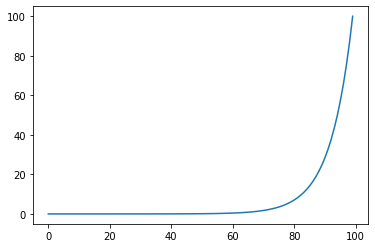

In [ ]:
MSE = []
cvals = np.logspace(-4,2,num=100) #array of lambda values
for c in cvals:
  err = l2_vec(x_train,y_train,x_valid,y_valid,c)
  MSE.append(err) #validation errors for the array of lambda values
mse_opt = min(MSE)
alloptind = [i for i, j in enumerate(MSE) if j == mse_opt]
opt_ind = max(alloptind)
c_opt = cvals[opt_ind]
print(MSE)
print(mse_opt)
print(c_opt) # determining the the value corresponding to min MSE as optimal lambda
plt.plot(cvals)
plt.show()


In [ ]:
def l2_bgd(x,y,alpha,c):
  iter =1000
  x = np.array(x)
  n = x.shape[1]
  wt = np.ones(n)
  J=np.zeros((iter,n-1))
  h = np.dot(x,wt)
  for i in range (0,iter):
    for j in range (0,n):
      x_ft = column(x,j)
      wt[j] = wt[j]*(1-(alpha*c))-alpha*sum((h-y)*x_ft)
  return wt

[11442687.862012142, 13882857.837652786, 16827723.537428036, 20379572.884420626, 24661053.652366083, 29819135.16589344, 36029814.43884654, 43503698.39086341, 52492614.405458696, 63297424.46021918, 76277243.31445928, 91860288.57005806, 110556619.39363882, 132973050.56132634, 159830558.10233122, 191984520.459266, 230448162.31012985, 276419583.6295804, 331312759.6509667, 396792882.0979887, 474816370.59091026, 567675805.5875525, 678049908.2643032, 809058503.3671663, 964322130.4410771, 1148025596.4361217, 1364984265.7194617, 1620711238.0042605, 1921482747.3667078, 2274398106.698849, 2687429310.1982846, 3169453994.8260655, 3730263876.1362762, 4380539074.454473, 5131777041.0975485, 5996163249.945901, 6986369682.553436, 8115266738.99444, 9395534979.51473, 10839165556.941397, 12456842906.120035, 14257210779.65485, 16246033519.694305, 18425278742.89309, 20792165155.153393, 23338239101.86944, 26048563905.855644, 28901124211.504826, 31866559549.157124, 34908342469.34959, 37983501996.26754, 4104395

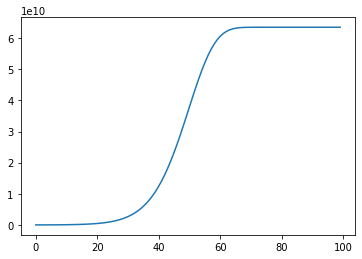

In [ ]:
MSE = [] # optimal learning rate alpha
avals = np.logspace(-4,0,num=100)
for a in avals:
  weight = l2_bgd(x_train,y_train,a,c_opt)
  sqr_error = 0
  for i in range(x_valid.shape[0]):
    sqr_error += (y_valid[i]- np.dot(weight.T,x_valid[i]))**2
  mse = sqr_error/(x_valid.shape[0])
  MSE.append(mse)
mse_opt = min(MSE)
alloptind = [i for i, j in enumerate(MSE) if j == mse_opt]
opt_ind = max(alloptind)
a_opt = avals[opt_ind]
print(MSE)
print(mse_opt)
print(a_opt) # optimal learning rate alpha
plt.plot(MSE)
plt.show()

Testing using Vectorized Ridge Regression

In [ ]:
def l2_vect(x,y,C):
  n = x.shape[1]
  I = np.ones((n,n))
  mul = np.dot(x.T,y)
  pinv = np.dot(x.T,x)+C*I #pseudoinverse
  w = np.dot(np.linalg.inv(pinv),mul)
  return w

In [ ]:
weights = l2_vect(x_train,y_train,c_opt)
y_pred = []
sqr_error = 0
abs_error = 0
for i in range(x_test.shape[0]):
  sqr_error += (y_test[i]- np.dot(weights.T,x_test[i]))**2
  abs_error += np.abs(y_test[i]- np.dot(weights.T,x_test[i]))
  y_pred.append(np.dot(weights.T,x_test[i]))
mse = sqr_error/(x_test.shape[0])
mae = abs_error/(x_test.shape[0])
cc = np.corrcoef(y_pred,y_test).mean()
print("Mean Square Error: ", mse)
print("Mean Absolute Error: ",mae)
print("Correlation Coefficient: ",cc)

Mean Square Error:  13.773397029389496
Mean Absolute Error:  3.1622300463765924
Correlation Coefficient:  0.998097252172384


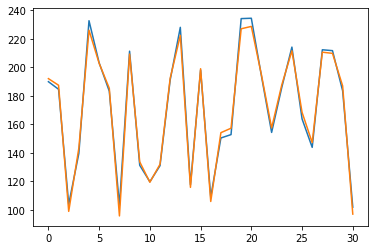

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)

Testing using BGD with L2-norm regularization

In [ ]:
def l2_bgd(x,y,alpha,c):
  iter =1000
  x = np.array(x)
  n = x.shape[1]
  wt = np.ones(n)
  J=np.zeros((iter,n-1))
  h = np.dot(x,wt)
  for i in range (0,iter):
    for j in range (0,n):
      x_ft = column(x,j)
      wt[j] = wt[j]*(1-(alpha*c))-alpha*sum((h-y)*x_ft)
  return wt

In [ ]:
weights = l2_bgd(x_train,y_train,a_opt,c_opt)
y_pred = []
sqr_error = 0
abs_error = 0
for i in range(x_test.shape[0]):
  sqr_error += (y_test[i]- np.dot(weights.T,x_test[i]))**2
  abs_error += np.abs(y_test[i]- np.dot(weights.T,x_test[i]))
  y_pred.append(np.dot(weights.T,x_test[i]))
mse = sqr_error/(x_test.shape[0])
mae = abs_error/(x_test.shape[0])
cc = np.corrcoef(y_pred,y_test).mean()
print("Mean Square Error: ", mse)
print("Mean Absolute Error: ",mae)
print("Correlation Coefficient: ",cc)

Mean Square Error:  12983227.342486639
Mean Absolute Error:  3454.2987437280176
Correlation Coefficient:  0.9817153147189259


In [ ]:
print(y_pred)
print(y_test)

[4486.200742331971, 4371.491782229891, 1633.0581736988051, 3285.1094263260015, 5157.895022327499, 4583.420964197164, 3882.424612758916, 1376.5705489238128, 4156.890516724472, 2481.787661680283, 2529.078234889463, 2573.3933226207237, 4053.7677557224592, 4797.961234725126, 2176.52344272198, 4658.395525500254, 1802.564184094339, 3382.571423914022, 3627.538736686969, 4912.706319008635, 4818.314914972076, 4110.914449238728, 3198.461314252931, 3939.5229941578605, 4213.998387502518, 3333.646273587078, 3211.6002795769436, 4945.74316499433, 4755.5768170591045, 3789.3298582470165, 2147.6682882971536]
[189.8133487 184.4987484 103.7329808 139.4606425 232.6524149 203.0693287
 183.1539448 102.925247  211.2482974 131.0941245 119.5412237 130.8462633
 191.0013544 227.9935935 117.4737527 198.0017863 108.8150963 150.2869268
 152.6557429 234.1324181 234.3835354 193.6699475 154.189843  185.741987
 214.1127793 163.6873765 143.7011054 212.2416561 211.6262702 183.4206794
 101.6929019]


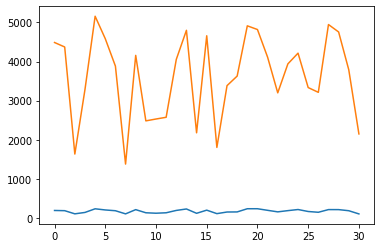

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)

#L1- Norm (Lasso) Regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.7, random_state =26)
x_valid, x_test, y_valid, y_test = train_test_split(x_test,y_test, test_size=0.33, random_state =25)

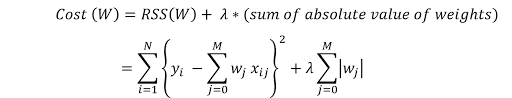

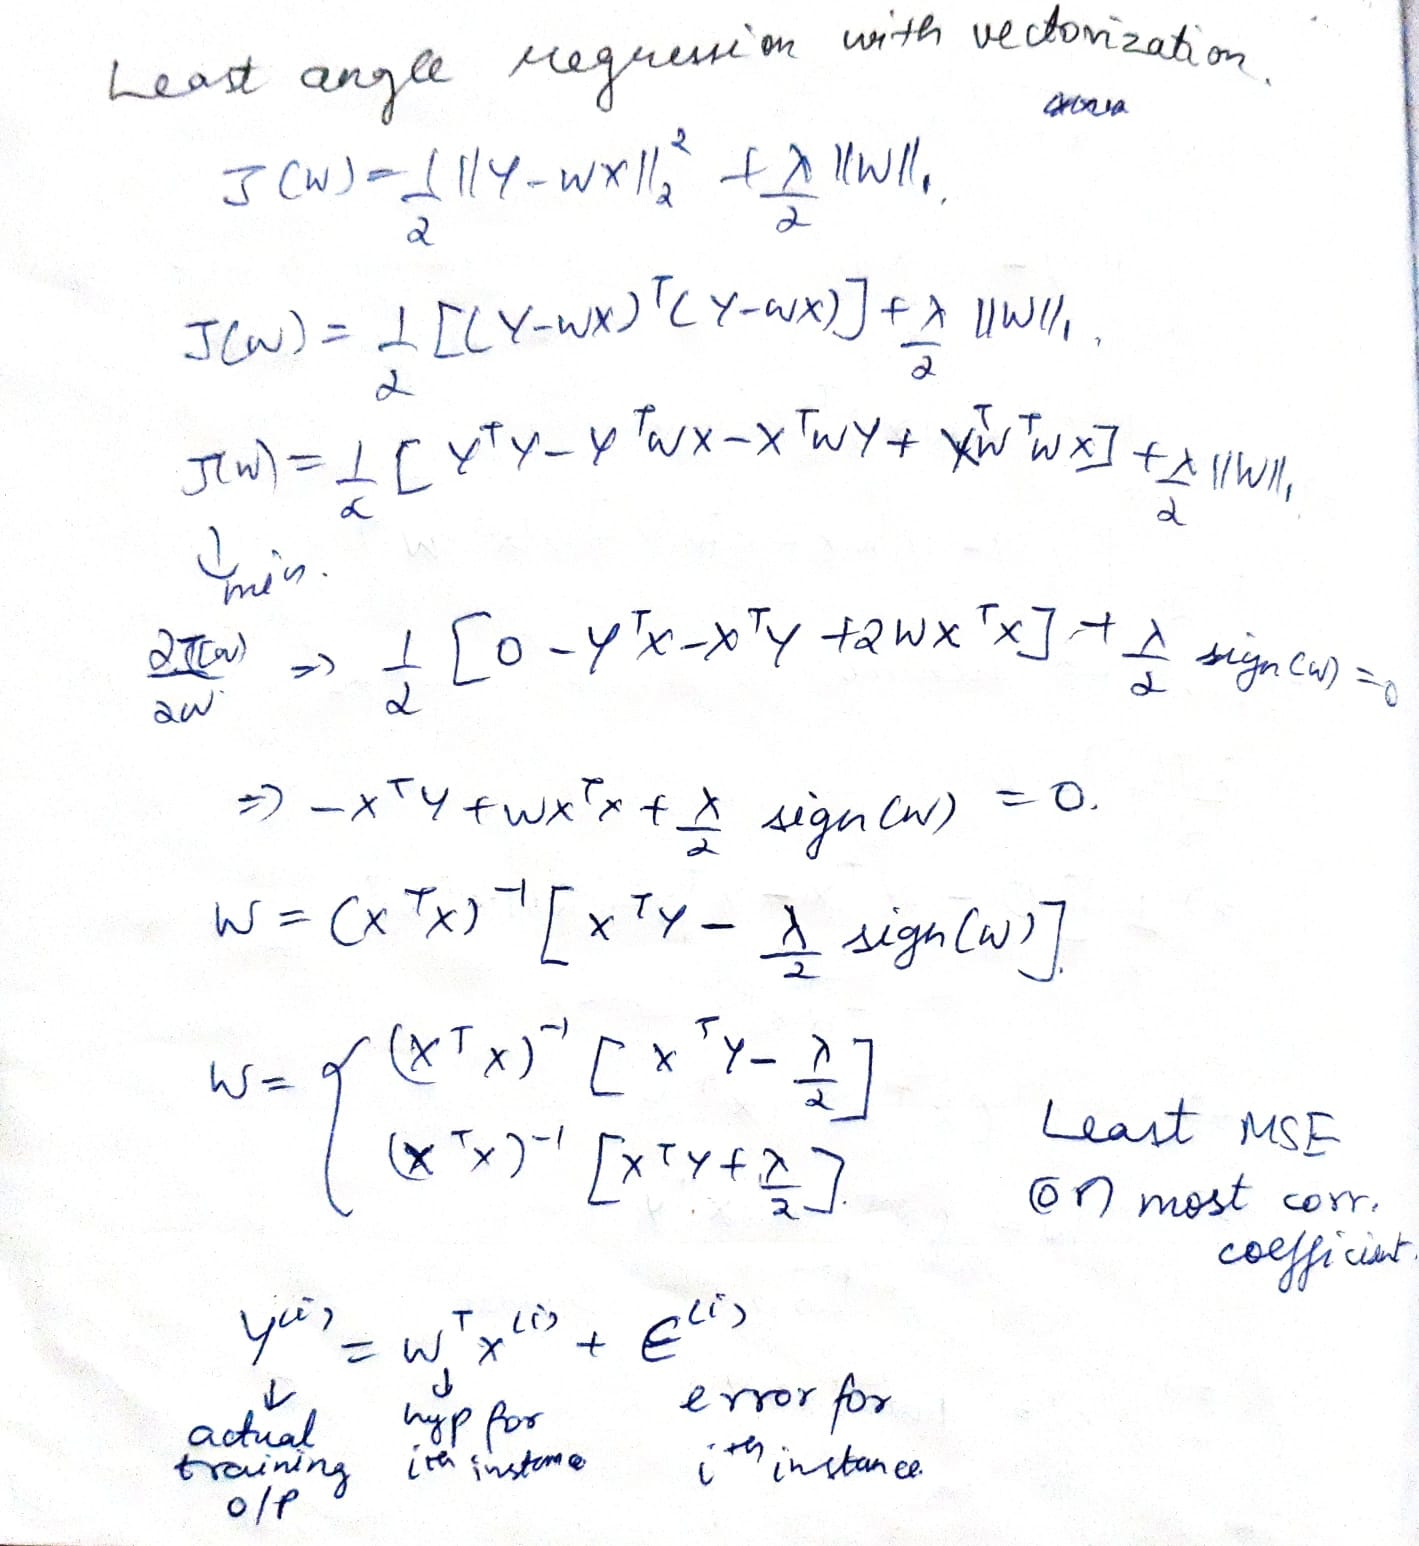

Finding optimal hyperparameters using grid search

In [ ]:
def l1_vec(x,y,xv,yv,C):
  n = x.shape[1]
  I = np.ones((n,n))
  mul = np.dot(x.T,y)
  pinv = np.dot(x.T,x)
  w1 = np.dot(np.linalg.inv(pinv),(mul-(C*0.5)))
  w2 = np.dot(np.linalg.inv(pinv),(mul+(C*0.5)))
  #h = np.dot(w.T,x)
  m = xv.shape[0]
  sqr_error1 = 0
  sqr_error2 = 0
  for i in range(m):
    sqr_error1 += (yv[i]- np.dot(w1.T,xv[i]))**2
    sqr_error2 += (yv[i]- np.dot(w2.T,xv[i]))**2
  mse1 = sqr_error1/m
  mse2 = sqr_error2/m

  return min(mse1,mse2)

[13.521845138728091, 13.521845094436133, 13.521845043511133, 13.521844984959781, 13.521844917640005, 13.521844840238685, 13.52184475124596, 13.521844648926042, 13.52184453128308, 13.521844396022376, 13.52184424050556, 13.521844061699195, 13.52184385611563, 13.521843619744756, 13.521843347976153, 13.521843035508892, 13.521842676248246, 13.521842263186784, 13.521841788267817, 13.521841242228144, 13.521840614417613, 13.52183989259111, 13.521839062670091, 13.521838108468026, 13.52183701137464, 13.521835749993247, 13.521834299723599, 13.521832632282395, 13.521830715151953, 13.521828510946587, 13.52182597668405, 13.521823062948176, 13.521819712926439, 13.521815861303288, 13.52181143298873, 13.521806341656525, 13.521800488064509, 13.521793758124307, 13.521786020682951, 13.521777124974195, 13.521766897690272, 13.521755139617921, 13.521741621774442, 13.521726080970366, 13.52170821471384, 13.521687675361092, 13.521664063402385, 13.521636919757709, 13.521605716939318, 13.521569848917352, 13.52152

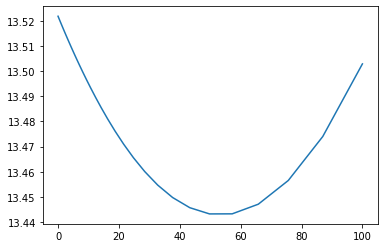

In [ ]:
MSE = []
cvals = np.logspace(-4,2,num=100)
for c in cvals:
  err = l1_vec(x_train,y_train,x_valid,y_valid,c)
  MSE.append(err) # finding the validation MSE for the array of lambda values
mse_opt = min(MSE)
alloptind = [i for i, j in enumerate(MSE) if j == mse_opt]
opt_ind = max(alloptind)
c_opt = cvals[opt_ind]
print(MSE)
print(mse_opt)
print(c_opt) # determining the the value corresponding to min MSE as optimal lambda
plt.plot(cvals,MSE)
plt.show()

Testing using Vectorized Lasso Regression

In [ ]:
def l1_vect(x,y,C):
  n = x.shape[1]
  I = np.ones((n,n))
  mul = np.dot(x.T,y)
  pinv = np.dot(x.T,x)
  w1 = np.dot(np.linalg.inv(pinv),(mul-(C*0.5)))
  w2 = np.dot(np.linalg.inv(pinv),(mul+(C*0.5)))
  #h = np.dot(w.T,x)
  m = x.shape[0]
  sqr_error1 = 0
  sqr_error2 = 0
  for i in range(m):
    sqr_error1 += (y[i]- np.dot(w1.T,x[i]))**2
    sqr_error2 += (y[i]- np.dot(w2.T,x[i]))**2
  mse1 = sqr_error1/m
  mse2 = sqr_error2/m

  if mse1<mse2:
    opt_wt =w1
  else:
    opt_wt =w2

  return opt_wt

In [ ]:
weights = l1_vect(x_train,y_train,c_opt)
y_pred = []
sqr_error = 0
abs_error = 0
for i in range(x_test.shape[0]):
  sqr_error += (y_test[i]- np.dot(weights.T,x_test[i]))**2
  abs_error += np.abs(y_test[i]- np.dot(weights.T,x_test[i]))
  y_pred.append(np.dot(weights.T,x_test[i]))
mse = sqr_error/(x_test.shape[0])
mae = abs_error/(x_test.shape[0])
cc = np.corrcoef(y_pred,y_test).mean()
print("Mean Square Error: ", mse)
print("Mean Absolute Error: ",mae)
print("Correlation Coefficient: ",cc)

Mean Square Error:  13.687635091836444
Mean Absolute Error:  3.1559323861202326
Correlation Coefficient:  0.9981066047524438


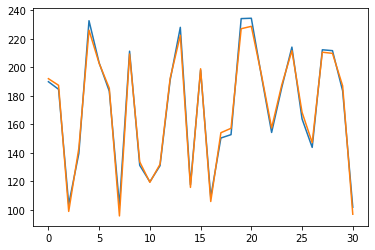

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred)

#Deep Neural Network Model


In [ ]:
Y = df2['Sat Vap Pressure']
X = df2.drop('Sat Vap Pressure',axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [ ]:
standard_scaler = StandardScaler()
x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(X_train),columns=X_train.columns)
x_test_scaled = pd.DataFrame(standard_scaler.transform(X_test),columns = X_test.columns)

In [ ]:
hidden_units1 = 200
hidden_units2 = 500
hidden_units3 = 300
learning_rate = 0.02

In [ ]:
def ANN():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='sigmoid'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='sigmoid'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='sigmoid'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model

In [ ]:
# build the model
model = ANN()

In [ ]:
#msle = MeanSquaredLogarithmicError()
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
#model.compile(loss=msle,optimizer=Adam(learning_rate=learning_rate),metrics=['mean_squared_error'])
history = model.fit(x_train_scaled.values,y_train.values,epochs=100,batch_size=1,validation_split=0.2)

Epoch 1/100
193/193 [==============================] - 1s 5ms/step - loss: 137.0816 - mean_squared_error: 20561.6172 - val_loss: 122.9361 - val_mean_squared_error: 17128.0156
Epoch 2/100
193/193 [==============================] - 1s 5ms/step - loss: 97.5203 - mean_squared_error: 11198.4375 - val_loss: 82.4055 - val_mean_squared_error: 8805.3789
Epoch 3/100
193/193 [==============================] - 1s 5ms/step - loss: 59.1533 - mean_squared_error: 5115.2988 - val_loss: 51.5183 - val_mean_squared_error: 4278.9434
Epoch 4/100
193/193 [==============================] - 1s 5ms/step - loss: 41.2843 - mean_squared_error: 2703.2705 - val_loss: 43.7195 - val_mean_squared_error: 2995.4333
Epoch 5/100
193/193 [==============================] - 1s 5ms/step - loss: 36.2571 - mean_squared_error: 2007.7787 - val_loss: 40.7816 - val_mean_squared_error: 2423.7939
Epoch 6/100
193/193 [==============================] - 1s 5ms/step - loss: 34.7505 - mean_squared_error: 1750.5824 - val_loss: 39.9078 - val

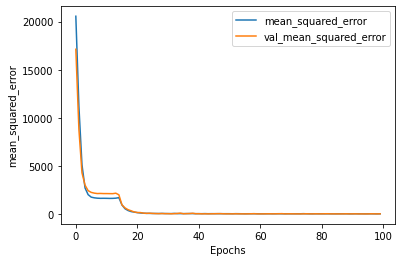

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_'+ 'mean_squared_error'])
plt.xlabel("Epochs")
plt.ylabel('mean_squared_error')
plt.legend(['mean_squared_error', 'val_'+'mean_squared_error'])
plt.show()

In [ ]:
y_predict = model.predict(x_test_scaled)

In [ ]:
y_predict.shape

(61, 1)

In [ ]:
list1 = list(y_predict)

In [ ]:
list2 = []
for i in range(len(list1)):
  list2.append(list(list1[i]))

In [ ]:
list3 = []
for i in range(len(list2)):
  list3.append(list2[i][0])

In [ ]:
y_prediction = np.array(list3)

In [ ]:
correlation_coefficient = np.corrcoef(y_prediction,y_test).mean()

In [ ]:
correlation_coefficient

0.9990686343119035

In [ ]:
model.evaluate(x_test_scaled, y_test,batch_size=1, verbose=1)

61/61 [==============================] - 0s 2ms/step - loss: 1.8169 - mean_squared_error: 12.8925


[1.8168684244155884, 12.892489433288574]

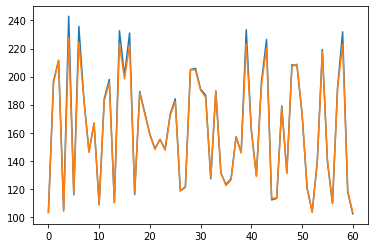

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test.tolist())
plt.plot(y_prediction)

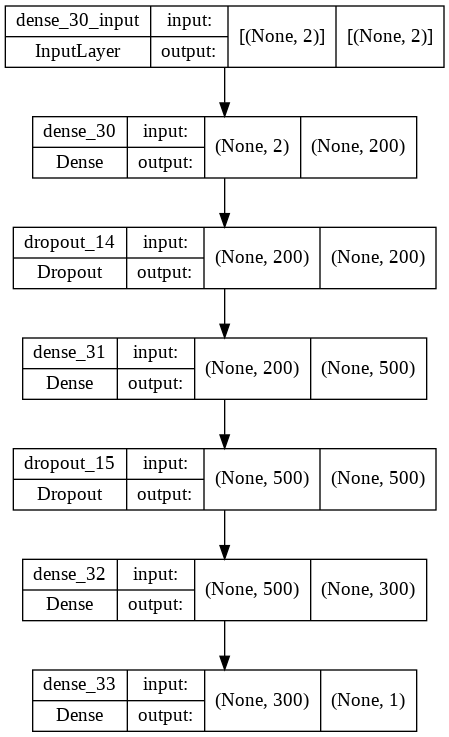

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes= True, show_layer_names=True)

#XG Boost Model

In [ ]:
import xgboost

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
model_1 = xgboost.XGBRegressor(objective ='reg:linear',n_estimators = 100, seed = 123)

In [ ]:
model_1.fit(x_train_scaled, y_train)

[13:24:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(seed=123)

In [ ]:
predicted_value = model_1.predict(x_test_scaled)

In [ ]:
rmse = np.sqrt(MSE(y_test, predicted_value))

In [ ]:
rmse

0.9399646417901627

In [ ]:
cc = np.corrcoef(predicted_value,y_test).mean()

In [ ]:
cc

0.9998760182166879

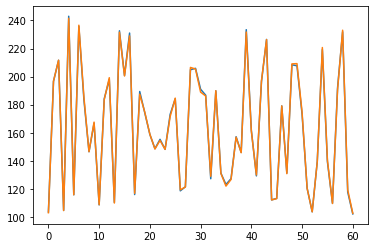

In [ ]:
plt.plot(y_test.tolist())
plt.plot(predicted_value)

#SVM Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train_scaled, y_train)

SVR()

In [ ]:
y_pred = regressor.predict(x_test_scaled)

In [ ]:
correlation_coeff =  np.corrcoef(y_pred,y_test).mean()

In [ ]:
correlation_coeff

0.9824549360347229

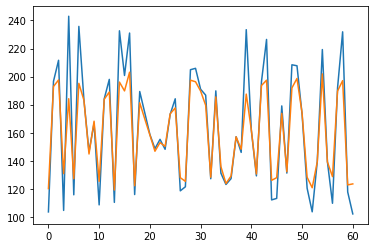

In [ ]:
plt.plot(y_test.tolist())
plt.plot(y_pred)

In [ ]:
rmse_svm = np.sqrt(MSE(y_test, y_pred))

In [ ]:
rmse_svm

16.252848067389255

#Random Forest Regressor

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [ ]:
# Cross-validation to get optimal number of estimators
correlation_coeff=[]
for n in [50,100,200,300,400,500]:
    RF = RandomForestRegressor(n_estimators=n, random_state=8)
    RF.fit(x_train_scaled, y_train)
    y_pred=RF.predict(x_test_scaled)
    correlation_coeff.append(np.corrcoef(y_pred,y_test).mean())

correlation_coeff    

[0.9998055620324772,
 0.9998139258537272,
 0.9998082961528209,
 0.9998122652175434,
 0.9998082974844581,
 0.9998116575160507]

In [ ]:
#Choosing 100 as the number of estimators as there isn't significant increase in correlation coefficient after that
RF = RandomForestRegressor(n_estimators=100, random_state=8)

In [ ]:
RF.fit(x_train_scaled, y_train)

RandomForestRegressor(random_state=8)

In [ ]:
RF.score(x_test_scaled,y_test)

0.9992545987401801

In [ ]:
y_pred=RF.predict(x_test_scaled)
y_pred

array([102.94536484, 198.72516964, 212.10807849, 104.30601523,
       241.04773575, 115.55308259, 236.06423778, 185.8609427 ,
       145.53048347, 166.20608536, 109.1297629 , 183.1145327 ,
       196.77000313, 109.25794054, 230.7654263 , 201.13154718,
       229.53755556, 117.37386376, 189.50230159, 175.48398601,
       158.04369799, 148.26139361, 154.4449298 , 148.07848636,
       171.69061458, 185.86061165, 119.18227135, 120.95005369,
       206.89035219, 204.99612724, 190.40546227, 186.60449745,
       128.00959211, 188.8700996 , 130.75578693, 122.06658092,
       126.84701352, 156.43354115, 145.92433066, 231.01372562,
       161.13452921, 128.48016049, 195.07235671, 225.15320839,
       112.21660067, 112.72395569, 179.3950294 , 130.73678407,
       209.97340357, 210.24225498, 175.23552341, 120.17323166,
       103.13634378, 139.06038538, 221.48820689, 140.88585347,
       108.90035828, 191.41897364, 232.30830894, 119.23782594,
       102.71320203])

In [ ]:
correlation_coeff =  np.corrcoef(y_pred,y_test).mean()
correlation_coeff

0.9998139258537272

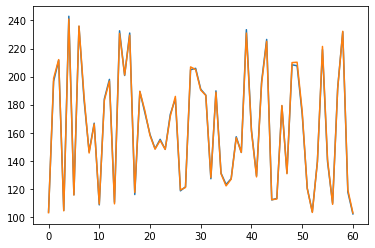

In [ ]:
plt.plot(y_test.tolist())
plt.plot(y_pred)

In [ ]:
rmse_rf = np.sqrt(MSE(y_pred, y_test))
rmse_rf

1.1484409800599138

#K-Nearest Neighbors Regressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Cross-Validation to get optimal k value
correlation_coeff=[]
for n in [1,2,3,4,5]:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train_scaled, y_train)
    y_pred=knn.predict(x_test_scaled)
    correlation_coeff.append(np.corrcoef(y_pred,y_test).mean())

correlation_coeff    

In [ ]:
# Optimal k value chosen to be 2 as no significant improvement in correlation coeff is observed.
knn_final = KNeighborsRegressor(n_neighbors=2)
knn_final.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
y_pred

array([104.53972938, 195.06427444, 212.857101  , 103.61897835,
       231.63559896, 116.49651672, 230.90714606, 181.92806574,
       146.06724452, 165.373264  , 107.87700412, 182.6120555 ,
       196.99270552, 109.30786706, 230.90714606, 201.43111894,
       229.26425622, 115.58487654, 193.14353936, 172.2361739 ,
       157.41923268, 146.06724452, 156.65450592, 148.669607  ,
       171.64625612, 183.30574918, 117.89390836, 120.33146486,
       203.88680036, 204.82799448, 190.00419478, 188.4447237 ,
       126.03260112, 188.25634754, 129.99226144, 121.97251328,
       127.32467332, 156.23934794, 145.57286232, 231.63559896,
       162.78150562, 130.88415834, 197.52566848, 221.09706838,
       110.7147496 , 111.45093548, 177.74139144, 130.88415834,
       206.77507406, 208.36711822, 171.91184524, 120.82650306,
       104.62310258, 138.2161403 , 217.56115802, 138.0429998 ,
       108.68974132, 193.74046358, 230.14359692, 118.13679858,
       103.10485736])

In [ ]:
correlation_coeff =  np.corrcoef(y_pred,y_test).mean()
correlation_coeff

0.9994981656858772

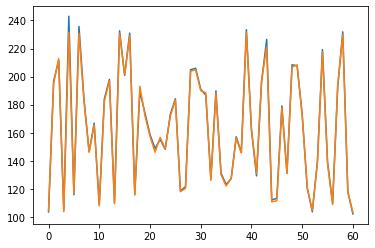

In [ ]:
plt.plot(y_test.tolist())
plt.plot(y_pred)

In [ ]:
rmse_knn = np.sqrt(MSE(y_test, y_pred))
rmse_knn

2.167152243435395